# Clustering models

In [1]:
#Useful libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Preprocessing

In [2]:
#Importing dataset
filename = 'data/covid_cases.csv'
data_covid = pd.read_csv(filename,sep=",",header=0)
data_covid.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [3]:
data_covid=data_covid[data_covid['year'] == 2020]
data_covid.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,05/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [4]:
data_covid.shape

(61833, 12)

In [5]:
data_covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [6]:
#Simplifying columns names
data_covid.rename(columns = {'countriesAndTerritories':'Country Name', 'cases':'COVID Cases',
                                   'deaths':'COVID Deaths','popData2019':'Population data 2019',
                           'continentExp':'Continent'}, inplace = True)

In [7]:
#Aggregations
data_covid = data_covid.groupby(['Continent','Country Name','year']).agg({'COVID Cases':'sum'
                                                                         ,'COVID Deaths':'sum'
                                                                         ,'Population data 2019':'mean'}).reset_index()
data_covid=data_covid.drop(['year'],axis='columns')
data_covid

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019
0,Africa,Algeria,92102,2596,43053054.0
1,Africa,Angola,16188,371,31825299.0
2,Africa,Benin,3090,44,11801151.0
3,Africa,Botswana,12501,37,2303703.0
4,Africa,Burkina_Faso,4030,71,20321383.0
...,...,...,...,...,...
209,Oceania,Papua_New_Guinea,725,8,8776119.0
210,Oceania,Solomon_Islands,17,0,669821.0
211,Oceania,Vanuatu,1,0,299882.0
212,Oceania,Wallis_and_Futuna,3,0,NaN


In [8]:
#Importing dataset of 
filename = 'data/physicians_per_1000.csv'
data_meds = pd.read_csv(filename,sep=",",header=0)
data_meds.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.035,NaN,NaN,NaN,NaN,0.063,...,0.2414,0.2846,0.2983,0.2850,0.2782,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.236817,NaN,NaN,NaN,NaN
4,Angola,AGO,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.067,NaN,NaN,NaN,NaN,0.076,...,NaN,NaN,NaN,NaN,NaN,0.214600,NaN,NaN,NaN,NaN
5,Albania,ALB,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,0.276,NaN,NaN,NaN,NaN,0.481,...,1.2683,1.2773,NaN,NaN,1.2164,NaN,2.1584,1.6471,NaN,NaN
6,Andorra,AND,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.3333,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.102697,NaN,NaN,NaN,NaN
8,United Arab Emirates,ARE,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.4767,1.7413,1.9953,2.2111,2.3710,2.435600,2.5278,NaN,NaN,NaN
9,Argentina,ARG,"Physicians (per 1,000 people)",SH.MED.PHYS.ZS,1.351,NaN,NaN,NaN,NaN,1.667,...,NaN,3.9385,NaN,3.9900,4.0013,3.990100,NaN,NaN,NaN,NaN


In [9]:
data_meds = data_meds.iloc[:, 0:1].join(data_meds.iloc[:, -5:])
data_meds.head()

,Country Name,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.191352,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,0.236817,NaN,NaN,NaN,NaN
4,Angola,0.214600,NaN,NaN,NaN,NaN


In [10]:
data_meds=data_meds.dropna(thresh=3).reset_index(drop = True)

In [11]:
data_meds['Max Meds per 1000 people'] = data_meds.iloc[:,2:].max(axis=1)

In [12]:
data_meds= data_meds.iloc[:, 0:1].join(data_meds.iloc[:, -1:])

In [13]:
data_meds

,Country Name,Max Meds per 1000 people
0,Albania,2.1584
1,United Arab Emirates,2.5278
2,Australia,3.7595
3,Austria,5.2114
4,Belgium,5.9556
...,...,...
75,Timor-Leste,0.7687
76,Trinidad and Tobago,5.4073
77,Turkiye,1.8065
78,South Africa,0.7923


In [14]:
df3=pd.merge(data_covid, data_meds, on='Country Name')

In [15]:
df3.sample(5)

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019,Max Meds per 1000 people
19,America,Mexico,1250044,113953,127575529.0,4.8496
1,Africa,Chad,1770,102,15946882.0,0.0542
39,Europe,Denmark,109758,941,5806081.0,4.2247
55,Europe,Slovenia,96314,1459,2080908.0,3.1721
50,Europe,Lithuania,95021,825,2794184.0,6.3528


# Clustering

In [16]:
#Importing libraries
#Validation
from sklearn.metrics import silhouette_score
#Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
 
#Clustering models
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [17]:
df3.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Continent,59,5,Europe,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Name,59,59,India,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COVID Cases,59.0,NaN,NaN,NaN,592075.440678,1583093.284356,69.0,11013.0,109758.0,450765.0,9884100.0
COVID Deaths,59.0,NaN,NaN,NaN,14120.610169,34286.459494,0.0,178.5,1471.0,7981.0,181402.0
Population data 2019,59.0,NaN,NaN,NaN,55273130.135593,182480886.059349,71808.0,4386069.0,10724599.0,33914448.0,1366417756.0
Max Meds per 1000 people,59.0,NaN,NaN,NaN,2.795368,2.322942,0.0542,0.773,2.3106,4.3162,8.4199


In [18]:
lenc = LabelEncoder()
x_clust=df3.copy()
x_clust['Continent'] = lenc.fit_transform(df3['Continent'])
x_clust['Country Name'] = lenc.fit_transform(df3['Country Name'])

In [19]:
x_clust.head()

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019,Max Meds per 1000 people
0,0,6,3090,44,11801151.0,0.0791
1,0,10,1770,102,15946882.0,0.0542
2,0,20,53014,327,30417858.0,0.1064
3,0,36,10780,222,4525698.0,0.1865
4,0,37,515,10,1269670.0,2.5331


In [20]:
ss=StandardScaler()
x_clust=ss.fit_transform(x_clust)

In [21]:
#WCSS is calculated for different number of clusters and plotted to apply the Elbow method
wcss = [] 
for i in range(1, 11): 
    kmeans_wcss = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 'auto')
    kmeans_wcss.fit(x_clust) 
    wcss.append(kmeans_wcss.inertia_)

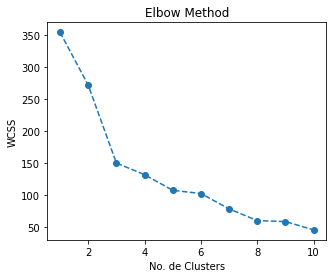

In [22]:
plt.figure(figsize=(5,4))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('No. de Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [23]:
#Silhouette Score is calculated for different number of clusters
silhouette_coefficients = []
for i in range(2,11): 
    model_km_ss = KMeans(n_clusters = i, random_state = 42, n_init = 'auto')
    # Fit the KMeans model
    model_km_ss.fit_predict(x_clust)
    # Calculate Silhoutte Score
    score = silhouette_score(x_clust, model_km_ss.labels_, metric='euclidean')
    # Print the score
    print('Clusters ',i, 'Silhouetter Score: %.3f' % score)
    silhouette_coefficients.append(score)

Clusters  2 Silhouetter Score: 0.293
Clusters  3 Silhouetter Score: 0.335
Clusters  4 Silhouetter Score: 0.278
Clusters  5 Silhouetter Score: 0.276
Clusters  6 Silhouetter Score: 0.233
Clusters  7 Silhouetter Score: 0.229
Clusters  8 Silhouetter Score: 0.278
Clusters  9 Silhouetter Score: 0.207
Clusters  10 Silhouetter Score: 0.258


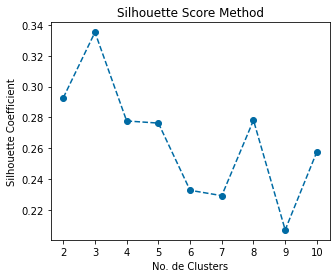

In [24]:
#Silhouette Scores are plotted against the number of clusters
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(5,4))
plt.plot(range(2,11),silhouette_coefficients,marker='o',linestyle='--')
plt.xticks(range(2, 11))
plt.xlabel("No. de Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Score Method')
plt.show()

In [25]:
# KMeans
model_KM = KMeans(n_clusters=3, n_init = 'auto')
model_KM.fit(x_clust)
yhat_KM=model_KM.predict(x_clust)
yhat_KM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
model_KM.cluster_centers_

array([[-0.70875542,  0.22071381, -0.29593742, -0.33693096, -0.10197456,
        -0.82814378],
       [ 0.75570492, -0.17826328, -0.04849064,  0.03744908, -0.18394666,
         0.89419234],
       [-0.30291524, -0.70466426,  4.96996154,  4.36121184,  4.05388442,
        -0.51060792]])

In [27]:
#The assigned cluster values are added to a new column in the main dataframe
#UPDF
final_df = df3.copy()
final_df['Cluster']=yhat_KM.copy()
final_df.head(5)

,Continent,Country Name,COVID Cases,COVID Deaths,Population data 2019,Max Meds per 1000 people,Cluster
0,Africa,Benin,3090,44,11801151.0,0.0791,0
1,Africa,Chad,1770,102,15946882.0,0.0542,0
2,Africa,Ghana,53014,327,30417858.0,0.1064,0
3,Africa,Mauritania,10780,222,4525698.0,0.1865,0
4,Africa,Mauritius,515,10,1269670.0,2.5331,0


In [28]:
final_df.groupby('Continent').mean()

,COVID Cases,COVID Deaths,Population data 2019,Max Meds per 1000 people,Cluster
Continent,,,,,
Africa,1.243540e+04,162.500000,1.459784e+07,0.355320,0.000000
America,8.432950e+05,28624.230769,3.739923e+07,2.702923,0.461538
Asia,1.001023e+06,15413.923077,1.715299e+08,1.503085,0.230769
Europe,4.910877e+05,11731.227273,1.699339e+07,4.678905,1.000000
Oceania,2.803100e+04,908.000000,2.520320e+07,3.759500,1.000000


In [29]:
#Average values of the main dataframe according to assigned cluster
cc=(pd.concat([final_df.groupby(by='Cluster').size(),final_df.groupby(by='Cluster').mean()],axis=1))
cc.columns.values[0:1]='Frequency'
cc

,Frequency,COVID Cases,COVID Deaths,Population data 2019,Max Meds per 1000 people
Cluster,,,,,
0,29,1.275662e+05,2666.758621,3.682309e+07,0.888010
1,28,5.159636e+05,15393.678571,2.199206e+07,4.854846
2,2,8.393026e+06,162378.500000,7.887336e+08,1.619350


In [30]:
#PCA application library is imported, model is defined and trained
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x_clust)

PCA()

In [31]:
pca.explained_variance_ratio_.cumsum()

array([0.43427302, 0.71529568, 0.86759074, 0.95301008, 0.99335437,
       1.        ])

In [32]:
pca.singular_values_

array([12.39889705,  9.97406753,  7.34250984,  5.49894946,  3.77913742,
        1.53380349])

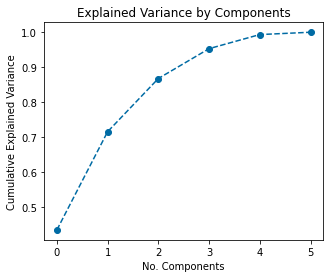

In [33]:
#The Explained Variance is plotted as the number of components used increases
plt.figure(figsize=(5,4))
plt.plot(range(0,len(pca.explained_variance_ratio_.cumsum())),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('No. Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [34]:
#The model is trained and component values with the optimal number of components are generated
pca=PCA(n_components=2)
x_clust_pca=pca.fit_transform(x_clust)

In [35]:
pca.components_

array([[ 0.05067676, -0.11687477,  0.61016706,  0.56325859,  0.54029069,
         0.04789627],
       [-0.64693926,  0.30343197,  0.03812826, -0.00572211,  0.14970681,
        -0.6822756 ]])

In [36]:
#The previously defined K means model is trained with the results after applying PCA.
model_KM.fit(x_clust_pca)
yhat_KM_pca=model_KM.predict(x_clust_pca)
yhat_KM_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
pd.DataFrame(yhat_KM == yhat_KM_pca).value_counts()

True    59
dtype: int64

In [38]:
#The centroids are obtained
model_KM.cluster_centers_

array([[-5.26824728e-01,  1.06589372e+00],
       [-5.91891185e-03, -1.18267279e+00],
       [ 7.72182333e+00,  1.10196023e+00]])

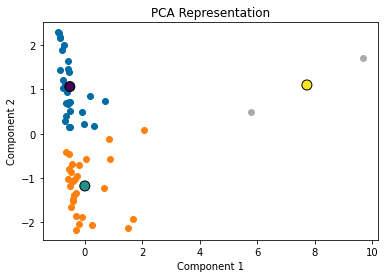

In [39]:
#A scatter plot of the clusters with the PCA values and their centroids is generated
plt.figure(figsize=(6,4))
clust_val = np.unique(yhat_KM_pca)
for val in clust_val:
 row_ix = np.where(yhat_KM_pca == val)
 plt.scatter(x_clust_pca[row_ix, 0], x_clust_pca[row_ix, 1])
plt.scatter(model_KM.cluster_centers_[:,0], model_KM.cluster_centers_[:,1], 
                s=100, c=clust_val, edgecolors='black')
plt.title('PCA Representation')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [40]:
# Mean Shift
model_MS=MeanShift()
yhat_MS=model_MS.fit_predict(x_clust_pca)
clusters_MS=np.unique(yhat_MS)

# Agglomerative clustering
model_AC=AgglomerativeClustering(n_clusters=3)
yhat_AC=model_AC.fit_predict(x_clust_pca)
clusters_AC=np.unique(yhat_AC)

# Gaussian Mixture
model_GM=GaussianMixture(n_components=3)
model_GM.fit(x_clust_pca)
yhat_GM=model_GM.predict(x_clust_pca)
clusters_GM=np.unique(yhat_GM)

# DBSCAN
model_DB = DBSCAN(eps=0.33, min_samples=9)
yhat_DB = model_DB.fit_predict(x_clust_pca)
clusters_DB = np.unique(yhat_DB)

In [41]:
yhat=[yhat_KM,yhat_KM_pca,yhat_MS,yhat_AC,yhat_GM,yhat_DB]
categories = ['Original','KMeans','Mean Shift','Agglomerative','Gaussian Mixture','DBScan']

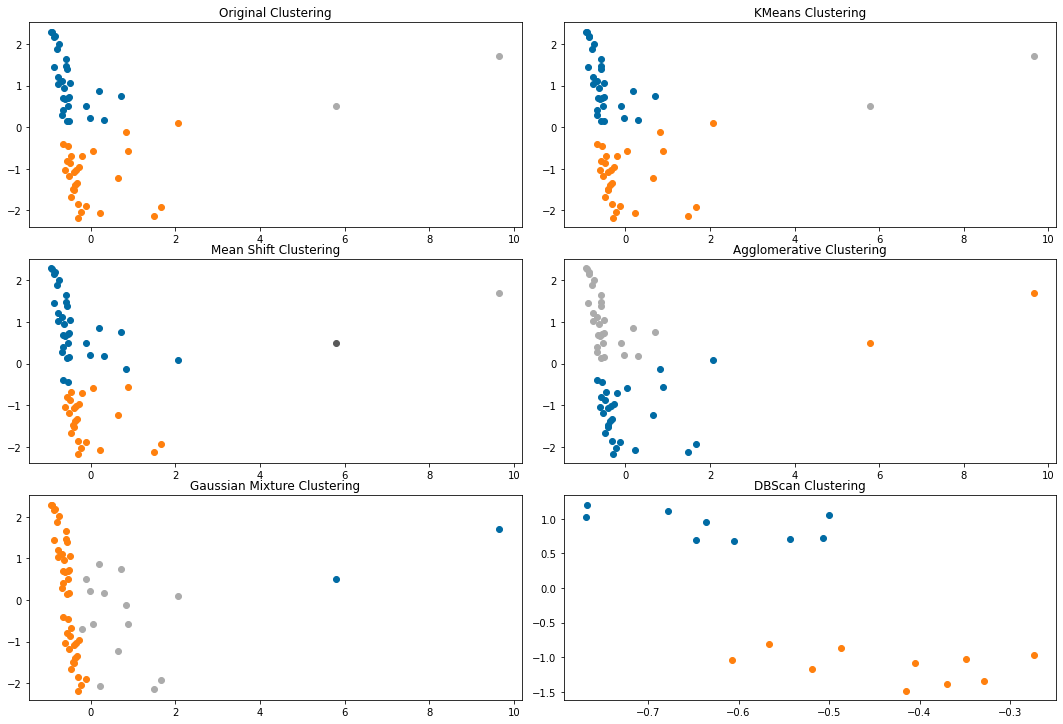

In [42]:
#Graphical comparison of clustering algorithms
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
fig.tight_layout()
plt.style.use('tableau-colorblind10')

m = 1  # Initialize the algorithm index

for j in range(3):
    for i in range(2):
        if i == 0 and j == 0:
            for class_value in range(4):
                row_ix = np.where(yhat_KM_pca == class_value)
                ax[0, 0].scatter(x_clust_pca[row_ix, 0], x_clust_pca[row_ix, 1])
            ax[0, 0].set_title(categories[0] + ' Clustering')
        else:
            if m < 6:
                for p in range(5):
                    row_ix = np.where(yhat[m] == p)
                    ax[j, i].scatter(x_clust_pca[row_ix, 0], x_clust_pca[row_ix, 1])
                ax[j, i].set_title(categories[m] + ' Clustering')
                m += 1

plt.show()

# Classification with neural networks

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
print(tf.__version__)

2.9.1


In [44]:
y_enc = pd.get_dummies(yhat_KM)

In [45]:
X_train, X_test, y_train, y_test=train_test_split(x_clust,y_enc,test_size=0.25)

In [46]:
#Classification with NN to generate cluster/class predictor model to which countries belong
# Input layer for no. of attributes, 256 neurons, and activation function ReLU
# Two intermediate layers with 128 and 64 neurons and activation function 'relu'
# Output layer with possible values equal to the number of classes and activation function 'softmax'

model_nn = Sequential([
Dense(256, input_dim=X_train.shape[1], activation='relu'),
Dense(128, activation='relu'),
Dense(64, activation='relu'),
Dense(y_train.shape[1], activation='softmax')
])

# The model is compiled with loss for classification and accuracy metrics
model_nn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [47]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 43,139
Trainable params: 43,139
Non-trainable params: 0
_________________________________________________________________


In [48]:
# We will calculate the validation results with 20% of the training info.
nn_history=model_nn.fit(X_train,y_train,epochs=100
                 , verbose=1
                 ,validation_split=0.2
                 )

Epoch 1/100
2/2 [==============================] - 2s 480ms/step - loss: 1.0424 - accuracy: 0.7143 - val_loss: 1.0595 - val_accuracy: 0.8889
Epoch 2/100
2/2 [==============================] - 0s 109ms/step - loss: 0.8700 - accuracy: 0.9143 - val_loss: 1.0095 - val_accuracy: 0.8889
Epoch 3/100
2/2 [==============================] - 0s 69ms/step - loss: 0.7325 - accuracy: 0.9714 - val_loss: 0.9745 - val_accuracy: 0.8889
Epoch 4/100
2/2 [==============================] - 0s 74ms/step - loss: 0.6077 - accuracy: 0.9714 - val_loss: 0.9450 - val_accuracy: 0.8889
Epoch 5/100
2/2 [==============================] - 0s 73ms/step - loss: 0.4918 - accuracy: 1.0000 - val_loss: 0.9348 - val_accuracy: 0.8889
Epoch 6/100
2/2 [==============================] - 0s 77ms/step - loss: 0.3913 - accuracy: 0.9714 - val_loss: 0.9386 - val_accuracy: 0.8889
Epoch 7/100
2/2 [==============================] - 0s 80ms/step - loss: 0.3037 - accuracy: 0.9714 - val_loss: 0.9606 - val_accuracy: 0.8889
Epoch 8/100
2/2 [=

In [49]:
hist=pd.DataFrame(nn_history.history)
hist['epoch']=nn_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.000330,1.0,2.057282,0.888889,95
96,0.000325,1.0,2.064719,0.888889,96
97,0.000319,1.0,2.070789,0.888889,97
98,0.000314,1.0,2.075509,0.888889,98
99,0.000309,1.0,2.079577,0.888889,99


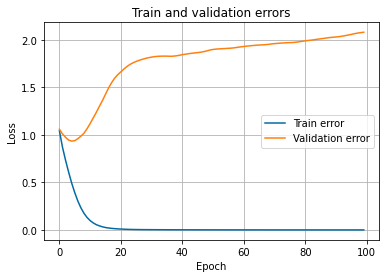

In [50]:
plt.figure(figsize=(6,4))
plt.plot(hist['loss'], label='Train error')
plt.plot(hist['val_loss'], label='Validation error')
plt.title('Train and validation errors')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
#Metrics are extracted by equating the model with the training set and the metric of interest is printed
loss, acc = model_nn.evaluate(X_train, y_train, verbose=2)
print('Train Error NN (Loss): {:5.4f}'.format(loss))

2/2 - 0s - loss: 0.4256 - accuracy: 0.9773 - 37ms/epoch - 19ms/step
Train Error NN (Loss): 0.4256


In [52]:
#Metrics are extracted by equating the model with the training set and the metric of interest is printed
loss, acc = model_nn.evaluate(X_test, y_test, verbose=2)
print('Test error NN (Loss): {:5.4f}'.format(loss))

1/1 - 0s - loss: 1.2516 - accuracy: 0.9333 - 66ms/epoch - 66ms/step
Test error NN (Loss): 1.2516


In [53]:
y_nn_pred_train = (model_nn.predict(X_train)).argmax(axis=1)
y_nn_pred_test = (model_nn.predict(X_test)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


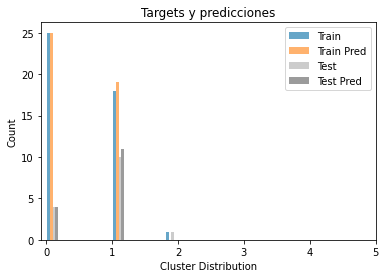

In [54]:
#Predictions are plotted using the training and test input data

fig, ax = plt.subplots()
ax.hist([y_train.idxmax(axis=1),y_nn_pred_train,
         y_test.idxmax(axis=1),y_nn_pred_test],
        alpha=0.6, label=['Train','Train Pred','Test','Test Pred'])
plt.xlabel('Cluster Distribution')
plt.ylabel('Count')
plt.legend(loc = "upper right")
plt.title("Targets y predicciones")
plt.xticks(range(0,len(X_train[0,:])))
plt.show()

In [55]:
#Confusion matrix of test and model predicted values
#Evaluation
print('Train data. NN. Confusion Matrix \n',confusion_matrix(y_train.idxmax(axis=1),y_nn_pred_train))
print('Test data. NN. Confusion Matrix \n',confusion_matrix(y_test.idxmax(axis=1),y_nn_pred_test))

Train data. NN. Confusion Matrix 
 [[25  0  0]
 [ 0 18  0]
 [ 0  1  0]]
Test data. NN. Confusion Matrix 
 [[ 4  0  0]
 [ 0 10  0]
 [ 0  1  0]]


In [56]:
print('Train NN \n',classification_report(y_train.idxmax(axis=1),y_nn_pred_train,zero_division=True))
print('Test NN \n',classification_report(y_test.idxmax(axis=1),y_nn_pred_test,zero_division=True))

Train NN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.95      1.00      0.97        18
           2       1.00      0.00      0.00         1

    accuracy                           0.98        44
   macro avg       0.98      0.67      0.66        44
weighted avg       0.98      0.98      0.97        44

Test NN 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.91      1.00      0.95        10
           2       1.00      0.00      0.00         1

    accuracy                           0.93        15
   macro avg       0.97      0.67      0.65        15
weighted avg       0.94      0.93      0.90        15

